In [1]:
#Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from numpy import nan
import matplotlib.pyplot as plt
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils.vis_utils import plot_model
from IPython.display import Image 

In [2]:
from sklearn import datasets
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import LabelBinarizer
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [3]:
import tensorflow as tf

In [4]:
path = './data_documentation/'
ranking_data = 'filtered_ranking_4_year_df.csv'

In [5]:
ranking_df = pd.read_csv(path + ranking_data, index_col = 0)

In [6]:
ranking_df

,Rank,CIP01BACHL,CIP04BACHL,CIP05BACHL,CIP26BACHL,CIP52BACHL,CIP09BACHL,CIP10BACHL,CIP11BACHL,CIP46BACHL,...,Alumni Salary,Acceptance Rate,SAT Lower,SAT Upper,ACT Lower,ACT Upper,10%_cut,5%_cut,20%_cut,50%_cut
0,456,0.0,0.0,1.0,1.0,2.0,1.0,0.0,1.0,0.0,...,87200.0,92.0,990.0,1370.0,21.0,28.0,7,14,3,1
1,475,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,...,103900.0,81.0,1080.0,1330.0,25.0,31.0,7,14,3,1
2,252,0.0,0.0,1.0,1.0,2.0,1.0,0.0,1.0,0.0,...,97400.0,53.0,1050.0,1280.0,23.0,32.0,3,7,1,0
3,166,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,...,104500.0,84.0,1130.0,1310.0,24.0,30.0,2,4,1,0
4,463,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,88300.0,62.0,1030.0,1260.0,23.0,29.0,7,14,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
634,118,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,110000.0,57.0,1150.0,1380.0,25.0,31.0,1,3,0,0
635,577,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,63.0,1190.0,1350.0,23.0,32.0,8,17,4,1
636,277,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,86500.0,69.0,1190.0,1380.0,25.0,30.0,4,8,2,0
637,519,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,...,80000.0,64.0,1060.0,1210.0,21.0,25.0,7,15,3,1


In [7]:
y_data = ranking_df['20%_cut']

In [8]:
y = y_data.to_numpy()

In [9]:
ranking_df = ranking_df.drop(columns = ['Rank', '5%_cut', '10%_cut', '20%_cut', '50%_cut', 'INSTNM'])

In [10]:
ranking_df

,CIP01BACHL,CIP04BACHL,CIP05BACHL,CIP26BACHL,CIP52BACHL,CIP09BACHL,CIP10BACHL,CIP11BACHL,CIP46BACHL,CIP13BACHL,...,Student Population,Net Price,Average Grant Aid,Total Annual Cost,Alumni Salary,Acceptance Rate,SAT Lower,SAT Upper,ACT Lower,ACT Upper
0,0.0,0.0,1.0,1.0,2.0,1.0,0.0,1.0,0.0,1.0,...,20902,17535,9254,36800,87200.0,92.0,990.0,1370.0,21.0,28.0
1,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,...,9101,19986,9587,36881,103900.0,81.0,1080.0,1330.0,25.0,31.0
2,0.0,0.0,1.0,1.0,2.0,1.0,0.0,1.0,0.0,1.0,...,38563,21973,16494,46744,97400.0,53.0,1050.0,1280.0,23.0,32.0
3,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,...,29776,23416,9030,49954,104500.0,84.0,1130.0,1310.0,24.0,30.0
4,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,...,1325,22853,26594,52414,88300.0,62.0,1030.0,1260.0,23.0,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
634,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,...,42699,13746,10703,41614,110000.0,57.0,1150.0,1380.0,25.0,31.0
635,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,386,20605,31845,65456,0.0,63.0,1190.0,1350.0,23.0,32.0
636,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,885,10248,9341,43678,86500.0,69.0,1190.0,1380.0,25.0,30.0
637,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,...,15317,15376,4726,39434,80000.0,64.0,1060.0,1210.0,21.0,25.0


In [11]:
# Splitting the data into training and test test
#X = ranking_df.iloc[:,1:196].values
X = ranking_df.values

In [12]:
X

array([[0.00e+00, 0.00e+00, 1.00e+00, ..., 1.37e+03, 2.10e+01, 2.80e+01],
       [0.00e+00, 0.00e+00, 0.00e+00, ..., 1.33e+03, 2.50e+01, 3.10e+01],
       [0.00e+00, 0.00e+00, 1.00e+00, ..., 1.28e+03, 2.30e+01, 3.20e+01],
       ...,
       [0.00e+00, 0.00e+00, 0.00e+00, ..., 1.38e+03, 2.50e+01, 3.00e+01],
       [0.00e+00, 0.00e+00, 0.00e+00, ..., 1.21e+03, 2.10e+01, 2.50e+01],
       [0.00e+00, 0.00e+00, 0.00e+00, ..., 1.13e+03, 2.00e+01, 2.50e+01]])

In [13]:
len(X[0])

122

In [14]:
X.shape

(639, 122)

In [15]:
y

array([3, 3, 1, 1, 3, 1, 4, 4, 4, 4, 1, 1, 3, 4, 2, 2, 2, 3, 3, 2, 0, 1,
       0, 3, 3, 2, 2, 3, 2, 3, 2, 3, 3, 3, 0, 0, 0, 0, 1, 0, 1, 2, 1, 0,
       0, 4, 3, 2, 0, 2, 4, 0, 1, 0, 0, 1, 0, 2, 1, 1, 3, 1, 2, 0, 2, 3,
       4, 0, 1, 3, 3, 4, 1, 0, 0, 1, 1, 4, 4, 2, 4, 0, 0, 1, 4, 1, 2, 0,
       0, 0, 1, 0, 2, 0, 0, 2, 4, 1, 3, 2, 2, 3, 2, 2, 2, 3, 1, 0, 0, 0,
       3, 3, 1, 1, 3, 3, 4, 3, 3, 2, 0, 0, 2, 4, 3, 0, 3, 4, 4, 3, 2, 4,
       3, 4, 3, 2, 4, 2, 0, 1, 3, 2, 4, 0, 1, 4, 1, 2, 2, 3, 1, 4, 4, 3,
       4, 0, 4, 4, 4, 0, 4, 3, 1, 0, 2, 2, 3, 2, 4, 4, 4, 0, 0, 0, 2, 1,
       3, 2, 3, 4, 3, 3, 2, 1, 0, 1, 1, 2, 3, 3, 3, 1, 2, 4, 4, 3, 3, 1,
       4, 4, 2, 3, 4, 4, 2, 4, 4, 1, 3, 3, 4, 4, 4, 0, 4, 0, 0, 0, 3, 3,
       3, 4, 0, 1, 1, 0, 2, 1, 1, 2, 2, 3, 0, 2, 0, 0, 0, 0, 1, 1, 2, 2,
       0, 0, 3, 1, 4, 0, 2, 2, 1, 1, 1, 2, 0, 1, 0, 0, 2, 1, 0, 0, 3, 4,
       4, 2, 4, 2, 3, 1, 1, 3, 0, 1, 2, 4, 4, 4, 2, 0, 2, 1, 3, 0, 4, 0,
       3, 2, 3, 1, 4, 1, 3, 0, 3, 1, 4, 2, 3, 3, 3,

In [16]:
from sklearn.preprocessing import LabelEncoder
encoder =  LabelEncoder()
y1 = encoder.fit_transform(y)

In [17]:
y1

array([3, 3, 1, 1, 3, 1, 4, 4, 4, 4, 1, 1, 3, 4, 2, 2, 2, 3, 3, 2, 0, 1,
       0, 3, 3, 2, 2, 3, 2, 3, 2, 3, 3, 3, 0, 0, 0, 0, 1, 0, 1, 2, 1, 0,
       0, 4, 3, 2, 0, 2, 4, 0, 1, 0, 0, 1, 0, 2, 1, 1, 3, 1, 2, 0, 2, 3,
       4, 0, 1, 3, 3, 4, 1, 0, 0, 1, 1, 4, 4, 2, 4, 0, 0, 1, 4, 1, 2, 0,
       0, 0, 1, 0, 2, 0, 0, 2, 4, 1, 3, 2, 2, 3, 2, 2, 2, 3, 1, 0, 0, 0,
       3, 3, 1, 1, 3, 3, 4, 3, 3, 2, 0, 0, 2, 4, 3, 0, 3, 4, 4, 3, 2, 4,
       3, 4, 3, 2, 4, 2, 0, 1, 3, 2, 4, 0, 1, 4, 1, 2, 2, 3, 1, 4, 4, 3,
       4, 0, 4, 4, 4, 0, 4, 3, 1, 0, 2, 2, 3, 2, 4, 4, 4, 0, 0, 0, 2, 1,
       3, 2, 3, 4, 3, 3, 2, 1, 0, 1, 1, 2, 3, 3, 3, 1, 2, 4, 4, 3, 3, 1,
       4, 4, 2, 3, 4, 4, 2, 4, 4, 1, 3, 3, 4, 4, 4, 0, 4, 0, 0, 0, 3, 3,
       3, 4, 0, 1, 1, 0, 2, 1, 1, 2, 2, 3, 0, 2, 0, 0, 0, 0, 1, 1, 2, 2,
       0, 0, 3, 1, 4, 0, 2, 2, 1, 1, 1, 2, 0, 1, 0, 0, 2, 1, 0, 0, 3, 4,
       4, 2, 4, 2, 3, 1, 1, 3, 0, 1, 2, 4, 4, 4, 2, 0, 2, 1, 3, 0, 4, 0,
       3, 2, 3, 1, 4, 1, 3, 0, 3, 1, 4, 2, 3, 3, 3,

In [18]:
Y = pd.get_dummies(y1).values

In [19]:
Y

array([[0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0],
       ...,
       [0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0]], dtype=uint8)

In [20]:
len(Y)

639

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 

In [22]:
#Defining the model 

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam

In [23]:
model = Sequential()
model.add(Dense(1000,input_dim = 122,activation='tanh', name = 'layer_1'))
#model.add(Dense(128,input_shape=(191,),activation='tanh', name = 'layer_1'))
#model.add(Dense(1000,activation='tanh', name = 'layer_2'))
#model.add(Dense(400,activation='tanh', name = 'layer_3'))
#model.add(Dense(400,activation='tanh', name = 'layer_4'))
#model.add(Dense(400,activation='tanh', name = 'layer_5'))
#model.add(Dense(400,activation='tanh', name = 'layer_6'))
model.add(Dense(5,activation='softmax'))

model.compile(Adam(lr=0.001),'categorical_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer_1 (Dense)              (None, 1000)              123000    
_________________________________________________________________
dense (Dense)                (None, 5)                 5005      
Total params: 128,005
Trainable params: 128,005
Non-trainable params: 0
_________________________________________________________________


In [24]:
X_train.shape

(511, 122)

In [25]:
y_train.shape

(511, 5)

In [26]:
#fitting the model and predicting 
model.fit(X_train,y_train,epochs=1000)
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/1000
16/16 [==============================] - 0s 2ms/step - loss: 1.7956 - accuracy: 0.2544
Epoch 2/1000
16/16 [==============================] - 0s 2ms/step - loss: 1.6421 - accuracy: 0.2505
Epoch 3/1000
16/16 [==============================] - 0s 2ms/step - loss: 1.5111 - accuracy: 0.3033
Epoch 4/1000
16/16 [==============================] - 0s 2ms/step - loss: 1.4502 - accuracy: 0.3542
Epoch 5/1000
16/16 [==============================] - 0s 2ms/step - loss: 1.4767 - accuracy: 0.3229
Epoch 6/1000
16/16 [==============================] - 0s 2ms/step - loss: 1.4747 - accuracy: 0.3190
Epoch 7/1000
16/16 [==============================] - 0s 2ms/step - loss: 1.3981 - accuracy: 0.3933
Epoch 8/1000
16/16 [==============================] - 0s 2ms/step - loss: 1.4225 - accuracy: 0.3288
Epoch 9/1000
16/16 [==============================] - 0s 3ms/step - loss: 1.3979 - accuracy: 0.3836
Epoch 10/1000
16/16 [==============================] - 0s 2ms/step - loss: 1.3974 - accuracy: 0.3757

16/16 [==============================] - 0s 2ms/step - loss: 1.0850 - accuracy: 0.5440
Epoch 83/1000
16/16 [==============================] - 0s 2ms/step - loss: 1.0930 - accuracy: 0.5577
Epoch 84/1000
16/16 [==============================] - 0s 2ms/step - loss: 1.0955 - accuracy: 0.5303
Epoch 85/1000
16/16 [==============================] - 0s 2ms/step - loss: 1.0904 - accuracy: 0.5421
Epoch 86/1000
16/16 [==============================] - 0s 2ms/step - loss: 1.0752 - accuracy: 0.5499
Epoch 87/1000
16/16 [==============================] - 0s 2ms/step - loss: 1.0615 - accuracy: 0.5675
Epoch 88/1000
16/16 [==============================] - 0s 2ms/step - loss: 1.0521 - accuracy: 0.5734
Epoch 89/1000
16/16 [==============================] - 0s 2ms/step - loss: 1.0667 - accuracy: 0.5714
Epoch 90/1000
16/16 [==============================] - 0s 2ms/step - loss: 1.0553 - accuracy: 0.5421
Epoch 91/1000
16/16 [==============================] - 0s 3ms/step - loss: 1.1293 - accuracy: 0.5147
Epoc

16/16 [==============================] - 0s 2ms/step - loss: 1.0605 - accuracy: 0.5636
Epoch 163/1000
16/16 [==============================] - 0s 2ms/step - loss: 1.0657 - accuracy: 0.5597
Epoch 164/1000
16/16 [==============================] - 0s 2ms/step - loss: 1.0183 - accuracy: 0.5597
Epoch 165/1000
16/16 [==============================] - 0s 2ms/step - loss: 1.0018 - accuracy: 0.5851
Epoch 166/1000
16/16 [==============================] - 0s 2ms/step - loss: 1.0066 - accuracy: 0.6027
Epoch 167/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.9696 - accuracy: 0.6086
Epoch 168/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.9874 - accuracy: 0.5890
Epoch 169/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.9785 - accuracy: 0.5910
Epoch 170/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.9552 - accuracy: 0.5949
Epoch 171/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.9730 - accuracy: 0.

16/16 [==============================] - 0s 2ms/step - loss: 0.9037 - accuracy: 0.6419
Epoch 243/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.9030 - accuracy: 0.6517
Epoch 244/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.9246 - accuracy: 0.6204
Epoch 245/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.9379 - accuracy: 0.6106
Epoch 246/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.9517 - accuracy: 0.6223
Epoch 247/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.9899 - accuracy: 0.6008
Epoch 248/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.9527 - accuracy: 0.6184
Epoch 249/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.9358 - accuracy: 0.6086
Epoch 250/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.9362 - accuracy: 0.6282
Epoch 251/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.9595 - accuracy: 0.

16/16 [==============================] - 0s 2ms/step - loss: 0.9079 - accuracy: 0.6399
Epoch 323/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.8928 - accuracy: 0.6419
Epoch 324/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.9002 - accuracy: 0.6517
Epoch 325/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.8827 - accuracy: 0.6497
Epoch 326/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.8969 - accuracy: 0.6321
Epoch 327/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.8926 - accuracy: 0.6438
Epoch 328/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.9301 - accuracy: 0.6497
Epoch 329/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.8667 - accuracy: 0.6614
Epoch 330/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.9333 - accuracy: 0.6243
Epoch 331/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.9287 - accuracy: 0.

16/16 [==============================] - 0s 2ms/step - loss: 0.8593 - accuracy: 0.6693
Epoch 403/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.8372 - accuracy: 0.6869
Epoch 404/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.8722 - accuracy: 0.6830
Epoch 405/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.8787 - accuracy: 0.6419
Epoch 406/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.8725 - accuracy: 0.6282
Epoch 407/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.8665 - accuracy: 0.6575
Epoch 408/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.8496 - accuracy: 0.6673
Epoch 409/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.8729 - accuracy: 0.6477
Epoch 410/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.8668 - accuracy: 0.6360
Epoch 411/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.8846 - accuracy: 0.

16/16 [==============================] - 0s 2ms/step - loss: 0.8628 - accuracy: 0.6556
Epoch 483/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.8228 - accuracy: 0.6634
Epoch 484/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.8177 - accuracy: 0.6810
Epoch 485/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.8696 - accuracy: 0.6438
Epoch 486/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.8348 - accuracy: 0.6654
Epoch 487/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.8224 - accuracy: 0.6869
Epoch 488/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.8452 - accuracy: 0.6673
Epoch 489/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.8228 - accuracy: 0.6830
Epoch 490/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.8213 - accuracy: 0.6791
Epoch 491/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.8091 - accuracy: 0.

16/16 [==============================] - 0s 2ms/step - loss: 0.7918 - accuracy: 0.6830
Epoch 563/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.8146 - accuracy: 0.6712
Epoch 564/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.8019 - accuracy: 0.6791
Epoch 565/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.7873 - accuracy: 0.7025
Epoch 566/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.8121 - accuracy: 0.6888
Epoch 567/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.7974 - accuracy: 0.6967
Epoch 568/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.8030 - accuracy: 0.6712
Epoch 569/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.8267 - accuracy: 0.6673
Epoch 570/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.7905 - accuracy: 0.6849
Epoch 571/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.7999 - accuracy: 0.

16/16 [==============================] - 0s 2ms/step - loss: 0.7761 - accuracy: 0.6810
Epoch 643/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.8141 - accuracy: 0.6830
Epoch 644/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.7863 - accuracy: 0.6888
Epoch 645/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.8080 - accuracy: 0.6751
Epoch 646/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.7776 - accuracy: 0.6947
Epoch 647/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.7928 - accuracy: 0.7045
Epoch 648/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.7950 - accuracy: 0.6712
Epoch 649/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.8169 - accuracy: 0.6771
Epoch 650/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.7835 - accuracy: 0.6830
Epoch 651/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.7729 - accuracy: 0.

16/16 [==============================] - 0s 2ms/step - loss: 0.7816 - accuracy: 0.7006
Epoch 723/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.8183 - accuracy: 0.6771
Epoch 724/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.7649 - accuracy: 0.7006
Epoch 725/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.7820 - accuracy: 0.6869
Epoch 726/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.7625 - accuracy: 0.7084
Epoch 727/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.7558 - accuracy: 0.6967
Epoch 728/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.7538 - accuracy: 0.7162
Epoch 729/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.7680 - accuracy: 0.7025
Epoch 730/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.7699 - accuracy: 0.6869
Epoch 731/1000
16/16 [==============================] - ETA: 0s - loss: 0.9448 - accuracy: 0.50 -

Epoch 802/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.8274 - accuracy: 0.6869
Epoch 803/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.8381 - accuracy: 0.6556
Epoch 804/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.7953 - accuracy: 0.6732
Epoch 805/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.7580 - accuracy: 0.7006
Epoch 806/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.7683 - accuracy: 0.6888
Epoch 807/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.7963 - accuracy: 0.6810
Epoch 808/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.7577 - accuracy: 0.6967
Epoch 809/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.7481 - accuracy: 0.7006
Epoch 810/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.8075 - accuracy: 0.6575
Epoch 811/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.8109

16/16 [==============================] - 0s 2ms/step - loss: 0.7351 - accuracy: 0.7299
Epoch 882/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.7545 - accuracy: 0.6830
Epoch 883/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.7360 - accuracy: 0.7084
Epoch 884/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.7381 - accuracy: 0.7143
Epoch 885/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.7680 - accuracy: 0.7084
Epoch 886/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.7756 - accuracy: 0.7162
Epoch 887/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.7419 - accuracy: 0.7065
Epoch 888/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.7558 - accuracy: 0.6947
Epoch 889/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.7557 - accuracy: 0.7006
Epoch 890/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.7845 - accuracy: 0.

16/16 [==============================] - 0s 2ms/step - loss: 0.7743 - accuracy: 0.6967
Epoch 962/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.7473 - accuracy: 0.6986
Epoch 963/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.7216 - accuracy: 0.7378
Epoch 964/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.7427 - accuracy: 0.7025
Epoch 965/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.7317 - accuracy: 0.7045
Epoch 966/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.7269 - accuracy: 0.7104
Epoch 967/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.7242 - accuracy: 0.7221
Epoch 968/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.7181 - accuracy: 0.6967
Epoch 969/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.7289 - accuracy: 0.7202
Epoch 970/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.7438 - accuracy: 0.

In [30]:

#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))
cm = confusion_matrix(y_test_class,y_pred_class)

              precision    recall  f1-score   support

           0       0.81      0.75      0.78        28
           1       0.41      0.52      0.46        23
           2       0.28      0.20      0.23        25
           3       0.32      0.55      0.40        22
           4       0.41      0.23      0.30        30

    accuracy                           0.45       128
   macro avg       0.45      0.45      0.43       128
weighted avg       0.46      0.45      0.44       128

[[21  3  1  1  2]
 [ 2 12  2  5  2]
 [ 2  7  5  9  2]
 [ 1  3  2 12  4]
 [ 0  4  8 11  7]]


In [42]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Reds):
    fig = plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

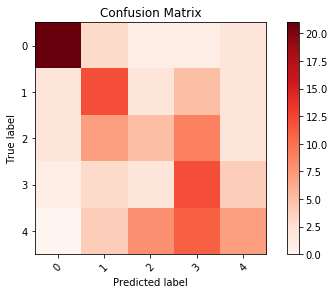

In [43]:
cm_plot_labels = [0, 1, 2, 3, 4]
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')
fig.savefig(path + 'neural_network_school_ranking_confusion_matrix.png', format = 'png' , bbox_inches='tight')

In [28]:
from sklearn.metrics import plot_confusion_matrix
fig = plt.figure()
plot_confusion_matrix(model, y_test_class, y_pred_class)
plt.show()
fig.savefig(path2 + 'school_ranking_confusion_matrix.png', format = 'png' , bbox_inches='tight')

ValueError: plot_confusion_matrix only supports classifiers

<Figure size 432x288 with 0 Axes>

In [ ]:
# Summary of neural network
model.summary()

In [ ]:
plot_model(model, show_shapes=True, show_layer_names=True, expand_nested = True, to_file='model.png')

In [ ]:
tf.keras.utils.plot_model(
    model, to_file='model.png', show_shapes=False, show_layer_names=True,
    rankdir='TB', expand_nested=True, dpi=96
)
